In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import BatchNormalization
from sklearn.naive_bayes import MultinomialNB

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import wordnet,stopwords
from wordcloud import WordCloud
import string

pd.set_option('display.max_colwidth',None)

In [2]:
path = '/kaggle/input/bbc-articles-dataset/bbc_text_cls.csv'
df = pd.read_csv(path)
df.head()

,text,labels
0,"Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL's existing customers for high-speed broadband. TimeWarner also has to restate 2000 and 2003 results following a probe by the US Securities Exchange Commission (SEC), which is close to concluding.\n\nTime Warner's fourth quarter profits were slightly better than analysts' expectations. But its film division saw profits slump 27% to $284m, helped by box-office flops Alexander and Catwoman, a sharp contrast to year-earlier, when the third and final film in the Lord of the Rings trilogy boosted results. For the full-year, TimeWarner posted a profit of $3.36bn, up 27% from its 2003 performance, while revenues grew 6.4% to $42.09bn. ""Our financial performance was strong, meeting or exceeding all of our full-year objectives and greatly enhancing our flexibility,"" chairman and chief executive Richard Parsons said. For 2005, TimeWarner is projecting operating earnings growth of around 5%, and also expects higher revenue and wider profit margins.\n\nTimeWarner is to restate its accounts as part of efforts to resolve an inquiry into AOL by US market regulators. It has already offered to pay $300m to settle charges, in a deal that is under review by the SEC. The company said it was unable to estimate the amount it needed to set aside for legal reserves, which it previously set at $500m. It intends to adjust the way it accounts for a deal with German music publisher Bertelsmann's purchase of a stake in AOL Europe, which it had reported as advertising revenue. It will now book the sale of its stake in AOL Europe as a loss on the value of that stake.",business
1,"Dollar gains on Greenspan speech\n\nThe dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.\n\nAnd Alan Greenspan highlighted the US government's willingness to curb spending and rising household savings as factors which may help to reduce it. In late trading in New York, the dollar reached $1.2871 against the euro, from $1.2974 on Thursday. Market concerns about the deficit has hit the greenback in recent months. On Friday, Federal Reserve chairman Mr Greenspan's speech in London ahead of the meeting of G7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected US jobs data. ""I think the chairman's taking a much more sanguine view on the current account deficit than he's taken for some time,"" said Robert Sinche, head of currency strategy at Bank of America in New York. ""He's taking a longer-term view, laying out a set of conditions under which the current account deficit can improve this year and next.""\n\nWorries about the deficit concerns about China do, however, remain. China's currency remains pegged to the dollar and the US currency's sharp falls in recent months have therefore made Chinese export prices highly competitive. But calls for a shift in Beijing's policy have fallen on deaf ears, despite recent comments in a maj

In [3]:
inputs = df['text']
labels = df['labels']

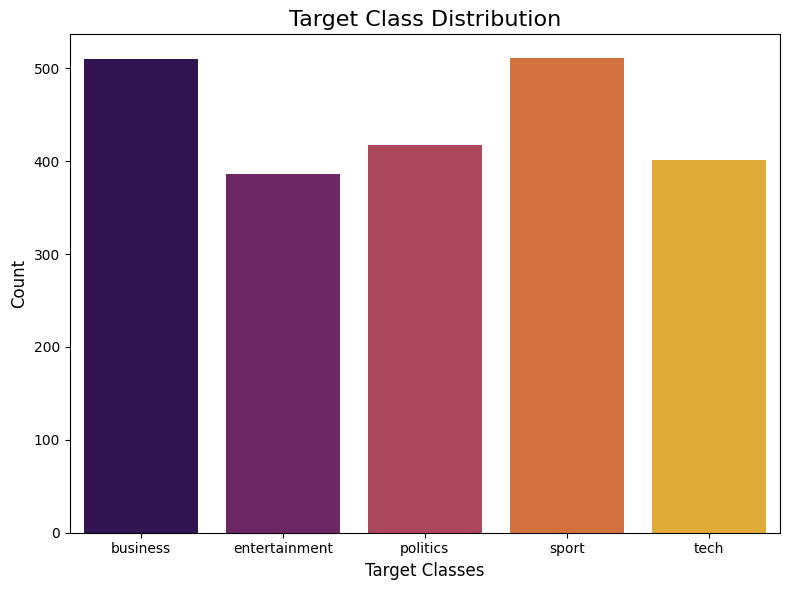

In [4]:
plt.figure(figsize = (8,6))
sns.countplot(x = labels, palette ='inferno')
plt.title('Target Class Distribution', fontsize = 16)
plt.xlabel('Target Classes', fontsize =12)
plt.ylabel('Count', fontsize =12)
plt.tight_layout()
plt.show()

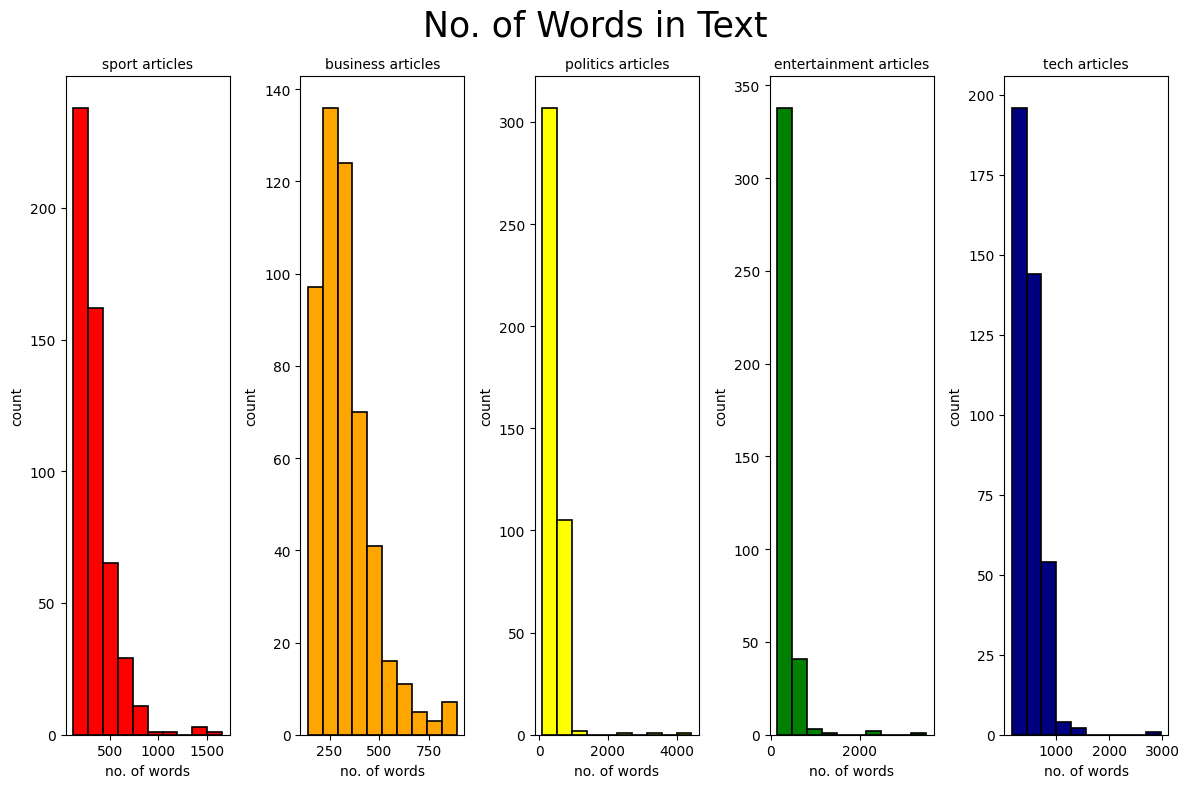

In [5]:
fig, axes = plt.subplots(ncols=5, figsize=(12, 8))

categories = ['sport', 'business', 'politics', 'entertainment', 'tech']
colors = ['red', 'orange', 'yellow', 'green', 'navy']

for ax, category, color in zip(axes, categories, colors):
    word_lengths = df[df['labels'] == category]['text'].str.split().map(len)
    ax.hist(word_lengths, color=color, edgecolor='black', linewidth=1.2)
    ax.set_title(f'{category} articles', size=10)
    ax.set_xlabel('no. of words', size=10)
    ax.set_ylabel('count', size=10)

plt.suptitle("No. of Words in Text", size=25)
plt.tight_layout()
plt.show()

In [6]:
categories = ['sport', 'business','politics','entertainment','tech']

for category in categories:
    word_lengths = df[df['labels'] == category]['text'].str.split().map(len)
    print(f'mean no. of words in {category} articles: {word_lengths.mean():.1f}')

mean no. of words in sport articles: 329.3
mean no. of words in business articles: 328.9
mean no. of words in politics articles: 454.0
mean no. of words in entertainment articles: 330.6
mean no. of words in tech articles: 502.7


/tmp/ipykernel_17/1061687144.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(char_lengths.map(np.mean), ax=ax, color=color)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_17/1061687144.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level fun

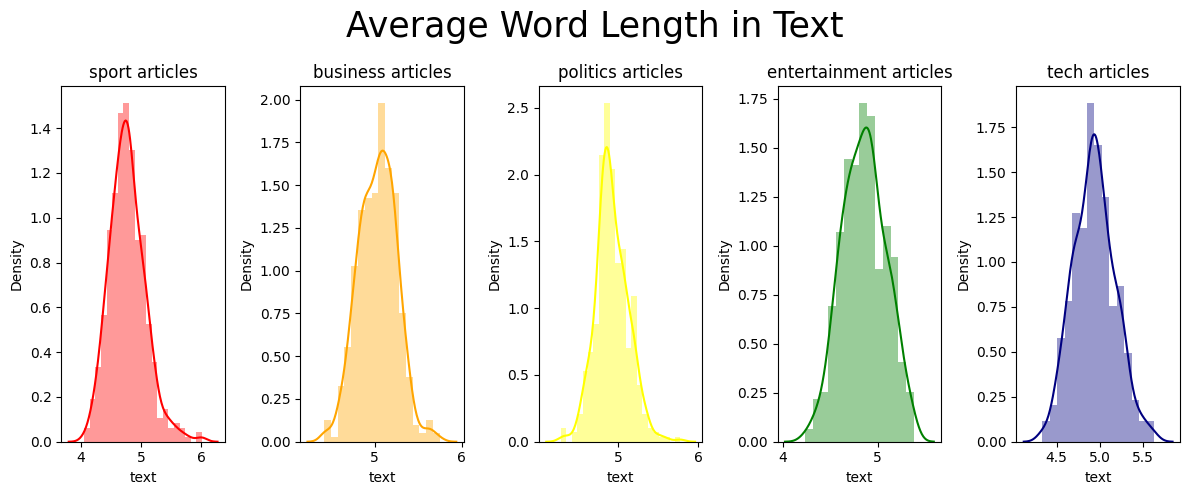

In [7]:
fig, axes = plt.subplots(ncols=5, figsize=(12, 5))

categories = ['sport', 'business', 'politics', 'entertainment', 'tech']
colors = ['red', 'orange', 'yellow', 'green', 'navy']

for ax, category, color in zip(axes, categories, colors):
    char_lengths = df[df['labels'] == category]['text'].str.split().apply(lambda x: [len(i) for i in x])
    sns.distplot(char_lengths.map(np.mean), ax=ax, color=color)
    ax.set_title(f'{category} articles', size=12)

plt.suptitle("Average Word Length in Text", size=25)
plt.tight_layout()
plt.show()

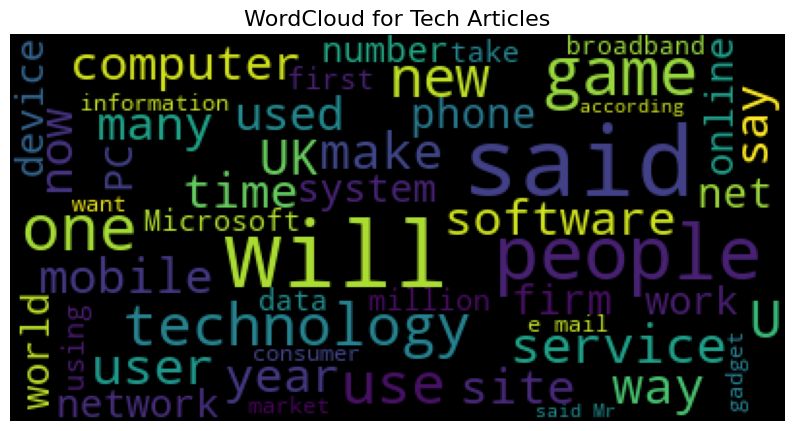

In [8]:
plt.figure(figsize=(10,6))
text = ' '.join(df[df['labels'] == 'tech']['text'])
wordcloud = WordCloud(max_font_size = 50, max_words = 50).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('WordCloud for Tech Articles', fontsize = 16)
plt.show()

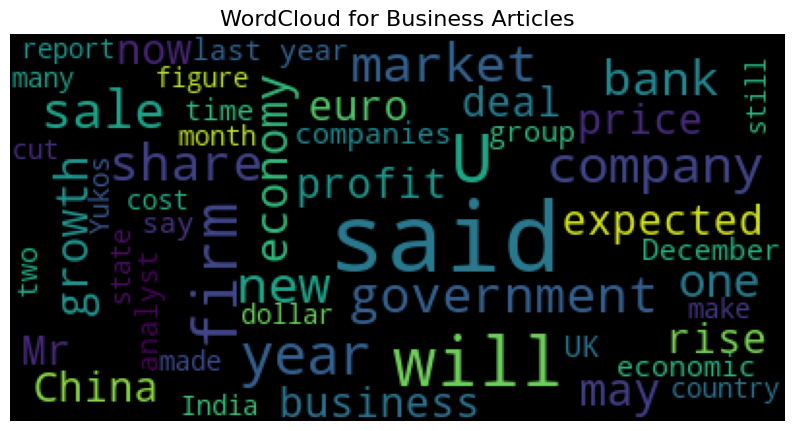

In [9]:
plt.figure(figsize=(10,6))
text = ' '.join(df[df['labels'] == 'business']['text'])
wordcloud = WordCloud(max_font_size = 50, max_words = 50).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('WordCloud for Business Articles', fontsize = 16)
plt.show()

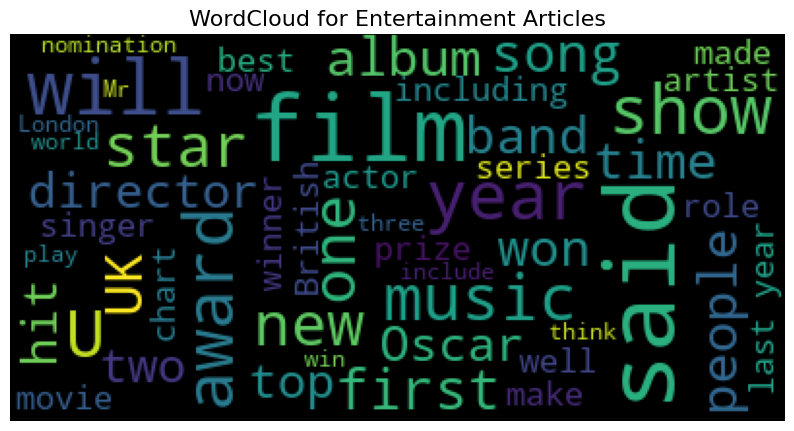

In [10]:
plt.figure(figsize=(10,6))
text = ' '.join(df[df['labels'] == 'entertainment']['text'])
wordcloud = WordCloud(max_font_size = 50, max_words = 50).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('WordCloud for Entertainment Articles', fontsize = 16)
plt.show()

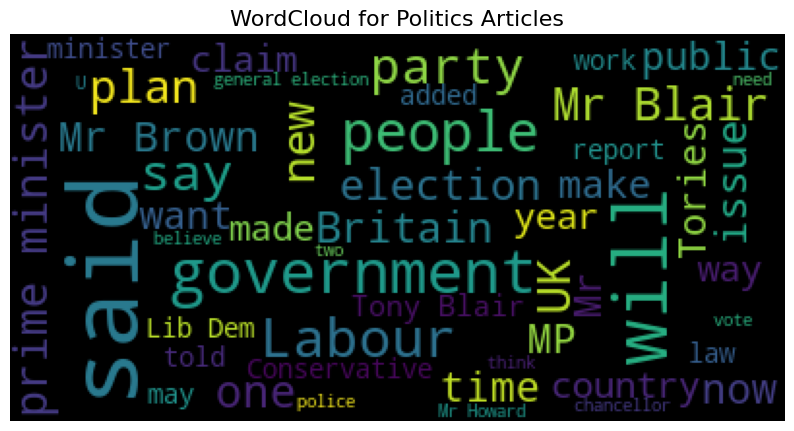

In [11]:
plt.figure(figsize=(10,6))
text = ' '.join(df[df['labels'] == 'politics']['text'])
wordcloud = WordCloud(max_font_size = 50, max_words = 50).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('WordCloud for Politics Articles', fontsize = 16)
plt.show()

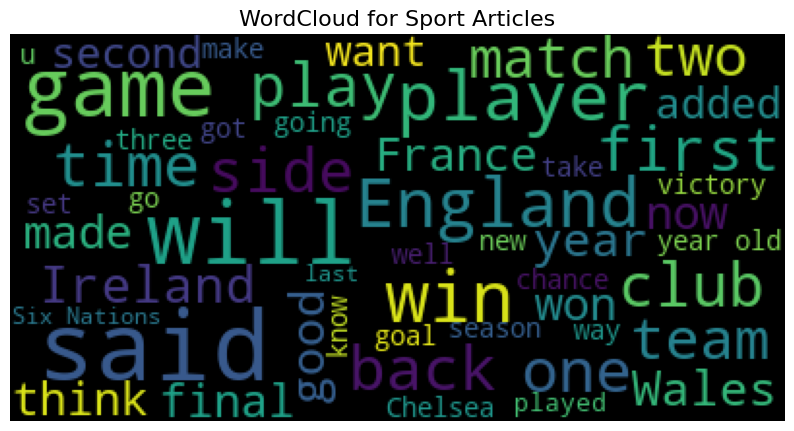

In [12]:
plt.figure(figsize=(10,6))
text = ' '.join(df[df['labels'] == 'sport']['text'])
wordcloud = WordCloud(max_font_size = 50, max_words = 50).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('WordCloud for Sport Articles', fontsize = 16)
plt.show()

# Text Preprocessing

In [13]:
X = df['text'].values
y = df['labels'].values

In [14]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.2, random_state= 247)

In [16]:
X_train = pd.Series(X_train)
X_test = pd.Series(X_test)

In [17]:
X_train = X_train.str.replace('\n',' ', regex = True)
X_test = X_test.str.replace('\n',' ', regex = True)

In [18]:
punct = "\n\r"+string.punctuation
X_train = X_train.str.translate(str.maketrans('','',punct))
X_test = X_test.str.translate(str.maketrans('','',punct))
X_train = X_train.apply(lambda x: x.lower())
X_test = X_test.apply(lambda x: x.lower())

In [19]:
X_train = X_train.values
X_test = X_test.values

In [20]:
X_train[0]

'clarke to press on with id cards  new home secretary charles clarke has vowed to plough on with plans for id cards despite a call for him to pause for thought from charles kennedy  the lib dem leader said david blunketts resignation was a good opportunity to question whether the legislation was necessary but mr clarke said he had supported the plans when mr blunkett argued for them in cabinet and he supported them now id cards are a means to creating a more secure society he said mr clarke acknowledged how the measure was introduced remained a matter for debate but he said legislation had already been significantly influenced by the recommendations of the commons home affairs committee  the issue would be debated in parliament next monday as scheduled he insisted earlier mr kennedy whose party opposes the id cards plan as deeply flawed said with christmas coming up the new home secretary had time to think again he told bbc radio 4s today programme that mr clarke had been reported to b

In [21]:
max_words = 10000
max_length = 100
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length)

In [22]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_length))
model.add(LSTM(64, return_sequences=True))
model.add(BatchNormalization()) 
model.add(Dropout(0.3))
model.add(LSTM(32))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(len(label_encoder.classes_),activation ='softmax'))

model.compile(loss = 'sparse_categorical_crossentropy',optimizer ='adam', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(X_train_padded, y_train, 
          epochs = 5, 
          batch_size = 32, 
          validation_split = 0.2)

Epoch 1/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.2823 - loss: 1.9712 - val_accuracy: 0.2388 - val_loss: 1.5911
Epoch 2/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.7565 - loss: 0.6833 - val_accuracy: 0.2865 - val_loss: 1.5565
Epoch 3/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.9568 - loss: 0.2000 - val_accuracy: 0.6124 - val_loss: 1.4603
Epoch 4/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.9858 - loss: 0.0791 - val_accuracy: 0.5730 - val_loss: 1.3378
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.9996 - loss: 0.0356 - val_accuracy: 0.7416 - val_loss: 1.1775


In [25]:
y_test_predictions = model.predict(X_test_padded)
y_test_pc = np.argmax(y_test_predictions, axis=1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


In [26]:
accuracy = accuracy_score(y_test, y_test_pc)
precision = precision_score(y_test, y_test_pc, average='macro')
recall = recall_score(y_test, y_test_pc, average='macro')
f1 = f1_score(y_test, y_test_pc, average='macro')

In [27]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.68
Precision: 0.73
Recall: 0.68
F1 Score: 0.68


# Count Vectorizer

In [28]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('average_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading average_perceptron_tagger: Package
[nltk_data]     'average_perceptron_tagger' not found in index
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [29]:
vectorizer = CountVectorizer()

X_train2 = vectorizer.fit_transform(X_train)
X_test2 = vectorizer.transform(X_test)

In [30]:
def get_test_scores(model_name: str, preds, y_test_data):
    '''
    Generate a table of test scores.
    
    In:
        model_name (string): Name for the model in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data
    
    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for the model
    '''
    scores = {
        'model': model_name,
        'precision': precision_score(y_test_data, preds, average='macro'),
        'recall': recall_score(y_test_data, preds, average='macro'),
        'F1': f1_score(y_test_data, preds, average='macro'),
        'accuracy': accuracy_score(y_test_data, preds)
    }
    
    return pd.DataFrame([scores])

In [31]:
MNB = MultinomialNB()
MNB.fit(X_train2, y_train)
MNB_train_preds = MNB.predict(X_train2)
MNB_train_results = get_test_scores('MNBB (train)', MNB_train_preds, y_train)
MNB_train_results

,model,precision,recall,F1,accuracy
0,MNBB (train),0.993307,0.993804,0.993548,0.99382
